In [1]:
# Importing needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# generating non-linear data

np.random.seed(12)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

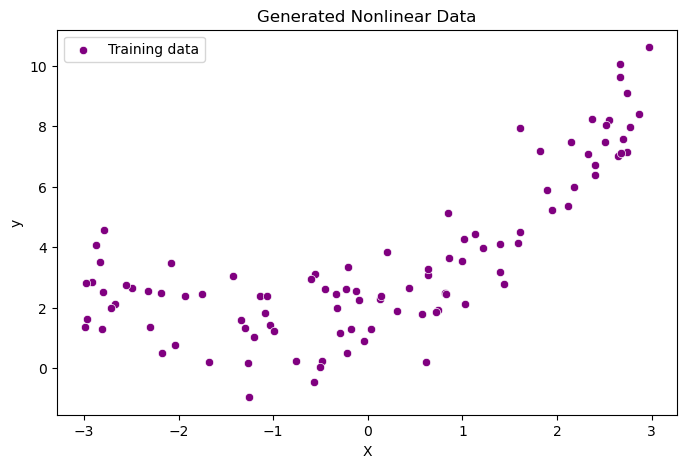

In [3]:
# Converting data into a dataframe 
df = pd.DataFrame({
    "X": X.ravel(),  # flatten
    "y": y.ravel()
})

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="X", y="y", color="purple", label="Training data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Nonlinear Data")
plt.legend()
plt.show()

In [4]:
# Learning Curve function 

def plot_learning_curve(model, X, y):

    # splitting the data
    x_train, x_val, y_train, y_val = train_test_split(X, y, random_state=12, test_size=0.25)
    train_errors, val_errors = [], []

    # Training the model on increasing sizes of the training data 
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])

        train_pred = model.predict(x_train[:m])
        val_pred = model.predict(x_val[:m])

        train_errors.append(mean_squared_error(y_train[:m], train_pred))
        val_errors.append(mean_squared_error(y_val[:m], val_pred))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


Linear Regression Learning curve


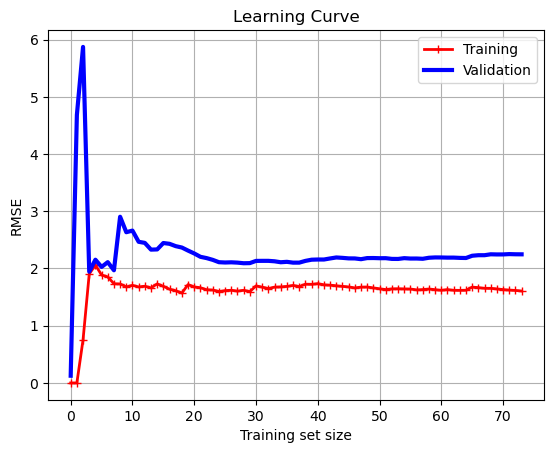

In [5]:
lin_reg = LinearRegression()
print("Linear Regression Learning curve")
plot_learning_curve(lin_reg, X, y)

In [ ]:
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])

Polynomial Regression (degree=2) Learning Curve:


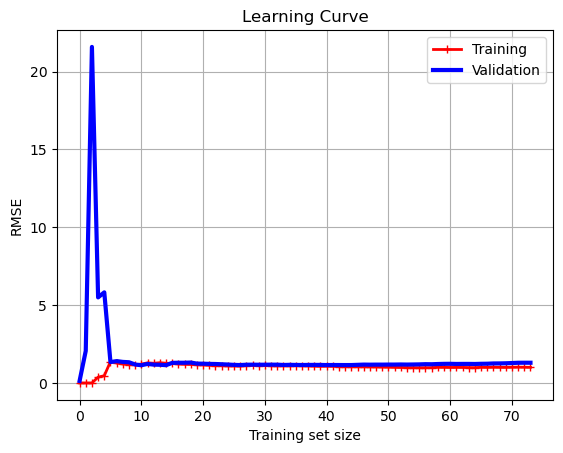

In [7]:
print("Polynomial Regression (degree=2) Learning Curve:")
plot_learning_curve(poly_reg, X, y)

Polynomial Regression (degree=15) Learning Curve:


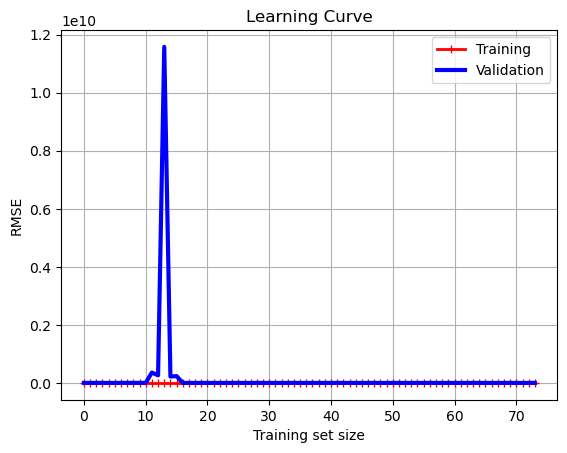

In [8]:
poly_reg_high = Pipeline([
    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
    ("lin_reg", LinearRegression())
])

print("Polynomial Regression (degree=15) Learning Curve:")
plot_learning_curve(poly_reg_high, X, y)

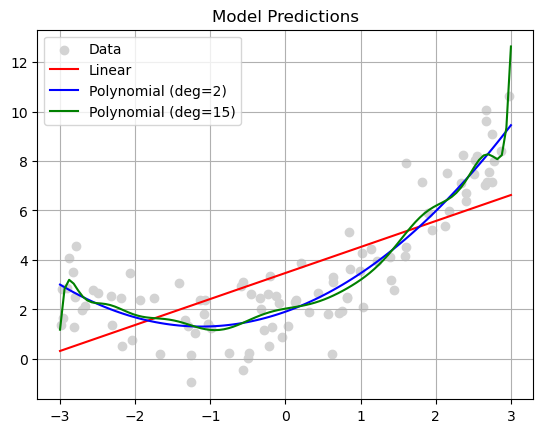

In [9]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

def plot_model(model, label, color):
    y_pred = model.predict(X_new)
    plt.plot(X_new, y_pred, label=label, color=color)

lin_reg.fit(X, y)
poly_reg.fit(X, y)
poly_reg_high.fit(X, y)

plt.scatter(X, y, c='lightgray', label='Data')
plot_model(lin_reg, "Linear", "red")
plot_model(poly_reg, "Polynomial (deg=2)", "blue")
plot_model(poly_reg_high, "Polynomial (deg=15)", "green")
plt.legend()
plt.title("Model Predictions")
plt.grid(True)
plt.show()